In [60]:
import  os
import  tensorflow as tf
import  numpy as np
from    tensorflow import keras
from utils import LoadFishDataUtil
from    tensorflow.keras import datasets, layers, optimizers, models
from    tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential

 
  


In [61]:
data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_TENT/SESSION1'
BATCH_SIZE = 8
IMG_SIZE=160
IMG_WIDTH=320
IMG_HEIGHT=60

In [62]:
myloadData = LoadFishDataUtil(data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT)
train_dataset,val_dataset,test_dataset,STEPS_PER_EPOCH, CLASS_NAMES,class_num = myloadData.loadFishData()
class_num
input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)

Tensor("Equal:0", shape=(330,), dtype=bool)


class VGG16(keras.Model):


    def __init__(self, input_shape,num_classes):
        """

        :param input_shape: [32, 32, 3]
        """
        super(VGG16, self).__init__()

        weight_decay = 0.000
        self.num_classes = num_classes

        model = models.Sequential()

        model.add(layers.Conv2D(64, (3, 3), padding='same',
                         input_shape=input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.3))

        model.add(layers.Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))


        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))


        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.4))

        model.add(layers.Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(layers.Dropout(0.5))

        model.add(layers.Flatten())
        model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(layers.Activation('relu'))
        model.add(layers.BatchNormalization())

        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(self.num_classes))
        # model.add(layers.Activation('softmax'))


        self.model = model


    def call(self, x):

        x = self.model(x)

        return x

In [63]:
weight_decay = 0.000

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=input_shape,
                        kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(512, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num))
model.add(layers.Activation('softmax'))

In [40]:
# build model and optimizer
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_172 (Conv2D)          (None, 320, 60, 64)       1792      
_________________________________________________________________
activation_182 (Activation)  (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization_182 (Bat (None, 320, 60, 64)       256       
_________________________________________________________________
dropout_132 (Dropout)        (None, 320, 60, 64)       0         
_________________________________________________________________
conv2d_173 (Conv2D)          (None, 320, 60, 64)       36928     
_________________________________________________________________
activation_183 (Activation)  (None, 320, 60, 64)       0         
_________________________________________________________________
batch_normalization_183 (Bat (None, 320, 60, 64)     

## training 


In [41]:
epochs = 10
validation_steps = 20
# train
history=model.fit(train_dataset, epochs=epochs,
          validation_data=val_dataset, verbose=1, validation_steps=validation_steps)

# evaluate on test set
scores = model.evaluate(test_dataset, verbose=1)
print("Final test loss and accuracy :", scores)

Train for 1428 steps, validate for 20 steps
Epoch 1/10
1428/1428 [==============================] - 69s 48ms/step - loss: 4.9434 - accuracy: 0.0661 - val_loss: 6.2656 - val_accuracy: 0.0375
Epoch 2/10
1428/1428 [==============================] - 50s 35ms/step - loss: 3.4678 - accuracy: 0.2188 - val_loss: 2.6140 - val_accuracy: 0.3000
Epoch 3/10
1428/1428 [==============================] - 50s 35ms/step - loss: 2.2396 - accuracy: 0.4383 - val_loss: 27.5722 - val_accuracy: 0.0125
Epoch 4/10
1428/1428 [==============================] - 49s 35ms/step - loss: 1.6460 - accuracy: 0.5660 - val_loss: 2.9335 - val_accuracy: 0.2750
Epoch 5/10
1428/1428 [==============================] - 50s 35ms/step - loss: 2.5186 - accuracy: 0.4631 - val_loss: 1.9107 - val_accuracy: 0.4625
Epoch 6/10
1428/1428 [==============================] - 50s 35ms/step - loss: 0.8948 - accuracy: 0.7590 - val_loss: 4.3196 - val_accuracy: 0.2188
Epoch 7/10
1428/1428 [==============================] - 50s 35ms/step - loss: 0

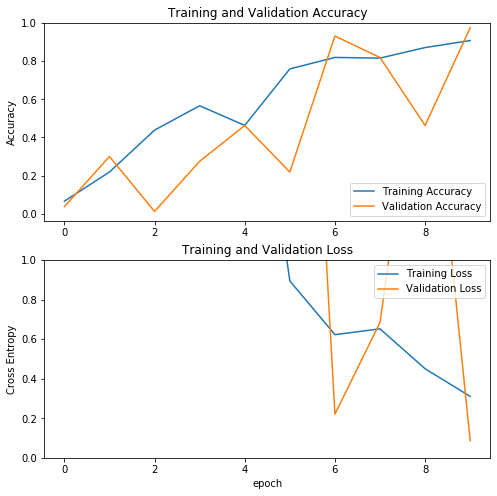

In [43]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Save model

In [ ]:
# Save the model
# model.save('vggfish.h5py')

In [44]:
model.save_weights('model/vggfish20191121TENT2.h5')

In [ ]:
#model.load_weights('vggfish20191120.h5')

In [58]:
test_data_dir ='/media/xingbo/Storage/fish_identification/data/SESSION_TENT/SESSION2'
BATCH_SIZE = 8
testloadData = LoadFishDataUtil(test_data_dir,BATCH_SIZE,IMG_WIDTH,IMG_HEIGHT,CLASS_NAMES)
sess2_test_dataset,sess2_class_num = testloadData.loadTestFishData()
n = 0
for image_batch, label_batch in sess2_test_dataset:
    feature=model(image_batch)
    n=n+1
    print(n)
    print(feature)



Tensor("Equal:0", shape=(330,), dtype=bool)
1
tf.Tensor(
[[  6.378532    -0.10433495  -3.8717012  ...  -7.968625    -5.270753
   -2.7406611 ]
 [-11.338883    34.229176   -26.47723    ... -29.400223   -32.91499
  -13.155441  ]
 [  5.323632    -2.7816906   -3.7923553  ... -10.926593   -13.67915
   -6.4666815 ]
 ...
 [  7.0085545    0.87029177   5.033677   ...  -5.2626796    1.4275545
   -4.704845  ]
 [  2.7025275   -3.07837      2.5292666  ...  -7.2149124   -1.1738114
   -7.376736  ]
 [  5.25907     -0.6881971   -2.0380416  ...  -8.0196295   -2.5529473
    1.9180431 ]], shape=(8, 330), dtype=float32)
2
tf.Tensor(
[[  5.904536     3.5062048   -2.353714   ...  -2.7964602   -2.436007
   -3.1460357 ]
 [ 12.595285     0.99281293   0.7634016  ... -10.893342    -3.4583035
   -0.7317903 ]
 [ -1.450279    -2.324523    -4.6325107  ...  -8.942472   -10.871902
   -0.5676263 ]
 ...
 [ 11.3400955    2.5425153    0.01675761 ...  -7.870334    -1.0445781
    0.05093637]
 [  4.0190797    3.0666547    9.19

16
tf.Tensor(
[[-38.22382     77.58316    -57.096775   ... -44.31125    -21.142515
  -22.533861  ]
 [ -2.7728462    0.86860144 -11.434768   ...  -4.2895427   -2.644599
   -3.538119  ]
 [-19.190748    55.69852    -38.32026    ... -40.40628    -30.434153
  -16.71618   ]
 ...
 [  2.4076679    2.7055337   -5.7060113  ...  -8.857587   -10.476996
   -0.91778046]
 [ -6.6788654   -0.7141324   -5.2725387  ...  -6.2202873  -13.761065
   -2.3374937 ]
 [  3.2831118    3.3759458    4.1658254  ...   1.5940137    6.8839025
   -2.1124659 ]], shape=(8, 330), dtype=float32)
17
tf.Tensor(
[[  3.981677    12.826516   -11.161367   ... -22.588976   -17.182726
   -2.3999743 ]
 [ -0.3530434    4.1034703    0.08183552 ...  -0.02616066  -2.7863002
   -4.5765905 ]
 [  6.8842616   -0.6687592   -3.2793093  ...  -9.372736   -13.405977
    0.14636701]
 ...
 [  2.979852     3.9308317   -1.1366338  ...  -3.9029577   -7.618122
   -2.5237844 ]
 [  5.5795274    0.26492912  -7.7150693  ...  -4.93156     -5.4249763
    6.0

In [59]:
loss0,accuracy0 = model.evaluate(sess2_test_dataset, steps = 20)

20/20 [==============================] - 0s 12ms/step - loss: 13.1353 - accuracy: 0.0250


for x,y in sess2_train_dataset:
    predictions = model.predict(x)
    #print(predictions[0])
    #print('predictions shape:', predictions.shape)
    print('x shape:', x.shape)
    for n in range(8):
        indxmax=np.argmax(predictions[n])
        #print('predictions max index:',indxmax)
        print('predictions:', CLASS_NAMES[indxmax] )
        print('real:', CLASS_NAMES[np.argwhere(y[n]).ravel()] )
       